-Notebook for modeling AXP prices / predictions
- In this notebook I introduce testing for stationarity using the Dicky Fuller test and differencing my values
- I then go on to create autoregressive, moving average, and ARIMA models & predictions

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score



/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
AXP = "/Users/davidhoffman/desktop/stocks_download/AXP_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(AXP, index_col="Date", parse_dates=True)

In [3]:
#Only keep closing price of the day
df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Name'], axis = 1, inplace = True)
df.drop(['Volume'], axis = 1, inplace = True)

In [4]:
df.head()

,Close
Date,
2006-01-03,52.58
2006-01-04,51.95
2006-01-05,52.50
2006-01-06,52.68
2006-01-09,53.99


In [5]:
#Perform Dicky Fuller test to test for stationarity
# Function taken from class lecture


def test_stationarity(timeseries):

    # Determining rolling statistics:
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    # Plotting rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Performing a Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    print(dfoutput )

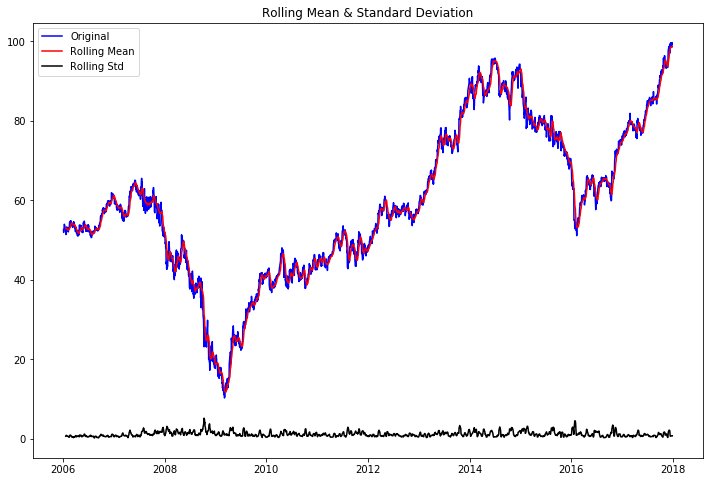

Results of Dickey-Fuller Test:
Test Statistic   -0.484108
p-value           0.895081
dtype: float64


In [6]:
#testing stationarity

test_stationarity(df.Close)

In [7]:
#High pvalue --> no stationarity

In [8]:
#Must get to a point of stationarity for the time series
#Will get the difference in my values

In [9]:
df['close_diff_1']=df.Close.diff()

In [10]:
df.head(5)

,Close,close_diff_1
Date,,
2006-01-03,52.58,NaN
2006-01-04,51.95,-0.63
2006-01-05,52.50,0.55
2006-01-06,52.68,0.18
2006-01-09,53.99,1.31


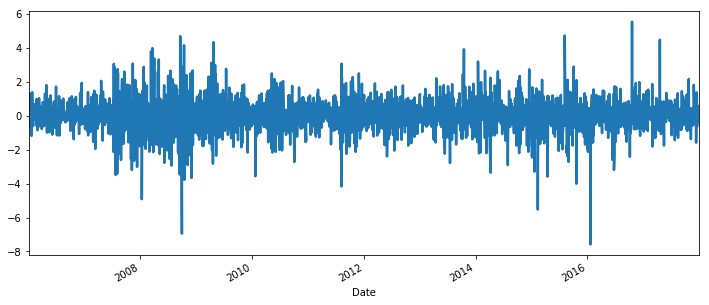

In [11]:
df['close_diff_1'].plot(lw=2.5, figsize=(12,5))
plt.show()

In [12]:
#looking for mean of zero for stationarity
df.close_diff_1.mean()

0.015478635309705203

In [13]:
#making a diff 2 to get mean closer to zero
df['close_diff_2']=df.close_diff_1.diff()

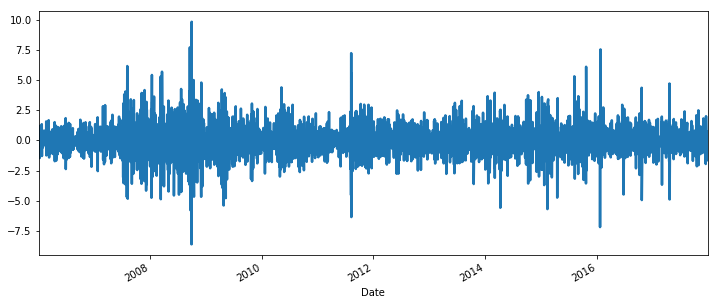

In [14]:
df['close_diff_2'].plot(lw=2.5, figsize=(12,5))
plt.show()

In [15]:
df.close_diff_2.mean()

7.952286282305994e-05

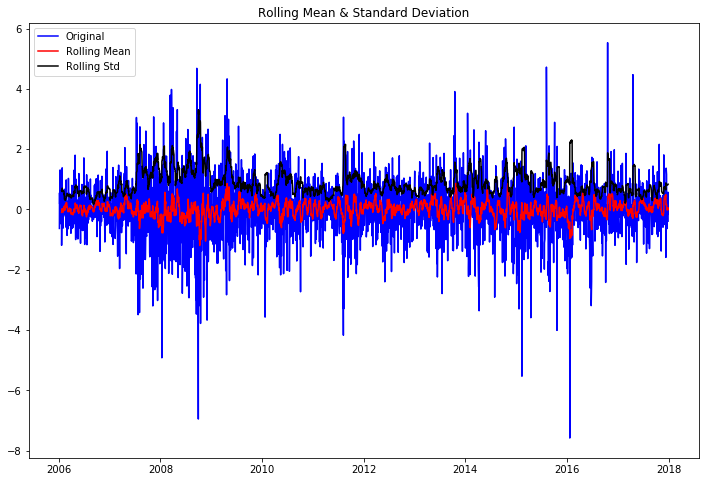

Results of Dickey-Fuller Test:
Test Statistic   -58.331926
p-value            0.000000
dtype: float64


In [16]:
#Testing for stationarity with my first differenced values 

test_stationarity(df.close_diff_1.dropna())

In [17]:
#pval is zero so we are stationary
#No need to further explore the second differencing column I made

In [18]:
#Building an AR model
#Autoregressive (AR) models use data from previous time points to predict the next time point. 
#These are essentially regression models in which the predictors are previous time points of the outcome.
#Typically, AR models are denoted as AR(p), where p indicates the number of previous time points to incorporate. 
#AR(1) is the most common.

#In an autoregressive model, we learn regression coefficients on the features that are the previous p values.

ar1 = ARMA(df.close_diff_1.dropna().values, (1, 0)).fit()


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [19]:
ar1.summary()


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3019
Model:                     ARMA(1, 0)   Log Likelihood               -4159.547
Method:                       css-mle   S.D. of innovations              0.960
Date:                Wed, 04 Apr 2018   AIC                           8325.095
Time:                        10:15:52   BIC                           8343.133
Sample:                             0   HQIC                          8331.581
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.016      0.941      0.347      -0.017       0.048
ar.L1.y       -0.0602      0.018     -3.313      0.001      -0.096      -0.025
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -16.6176           +0.0000j           16.6176            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
#Moving average model
#Moving average models take previous error terms as inputs. 
#They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence — e.g., something going out of stock affecting sales or a sudden rise in popularity.
#As with autoregressive models, we have an order term, q, 
#and we refer to our model as MA(q). This moving average model is dependent on the last q errors. If we have a time series of sales per week, $y_i$, we can regress each $y_i$ on the last q error terms.

ma1 = ARMA(df.close_diff_1.dropna().values, (0, 1)).fit()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [21]:
ma1.summary()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 3019
Model:                     ARMA(0, 1)   Log Likelihood               -4159.408
Method:                       css-mle   S.D. of innovations              0.960
Date:                Wed, 04 Apr 2018   AIC                           8324.816
Time:                        10:15:53   BIC                           8342.854
Sample:                             0   HQIC                          8331.302
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.016      0.946      0.344      -0.017       0.048
ma.L1.y       -0.0618      0.018     -3.358      0.001      -0.098      -0.026
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           16.1939           +0.0000j           16.1939            0.0000
-----------------------------------------------------------------------------
"""

In [22]:
#ARMA models combine autoregressive models and moving average models, 
#parameterizing the behavior of models with p and q terms that correspond to AR(p) models and MA(q) models.
#Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. 
#Moving average models base their predictions not on the prior value but instead on the prior error, 
#allowing us to correct sudden changes based on random events — supply, popularity spikes, etc.

#ARIMA is just like the ARMA(p, q) model, but, rather than predicting the value of the series, 
#it predicts the differenced series or changes in the series. 
#The order of differencing is set by a d term — as in ARIMA(p, d, q) — or alternatively, 
#you can just fit an ARMA(p, q) model on a differenced time series.

#Recall the Pandas diff() function. This computes the difference between two consecutive values. 
#In an ARIMA model, we attempt to predict this difference instead of the actual values.

#In modeling, we assume time series to be "stationary." This handles the stationarity assumption: 
#Instead of detrending or differencing manually, models do this via differencing terms.

In [23]:
#ARIMA model
ar1ma1 = ARIMA(df.Close.dropna().values, (1,1,1)).fit()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [24]:
ar1ma1.summary()

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 3019
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4158.992
Method:                       css-mle   S.D. of innovations              0.960
Date:                Wed, 04 Apr 2018   AIC                           8325.985
Time:                        10:15:53   BIC                           8350.036
Sample:                             1   HQIC                          8334.633
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.016      0.997      0.319      -0.015       0.046
ar.L1.D.y      0.5087      0.860      0.592      0.554      -1.176       2.193
ma.L1.D.y     -0.5631      0.827     -0.681      0.496      -2.185       1.058
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9660           +0.0000j            1.9660            0.0000
MA.1            1.7758           +0.0000j            1.7758            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
#Now that I have constructed my models, I am going to start making predictions and plotting them against one another

In [26]:
df.head()

,Close,close_diff_1,close_diff_2
Date,,,
2006-01-03,52.58,NaN,NaN
2006-01-04,51.95,-0.63,NaN
2006-01-05,52.50,0.55,1.18
2006-01-06,52.68,0.18,-0.37
2006-01-09,53.99,1.31,1.13


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


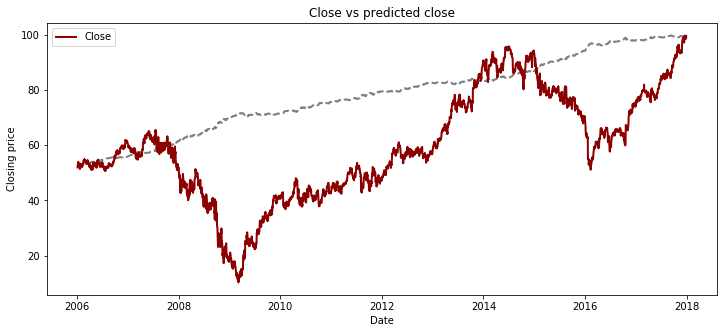

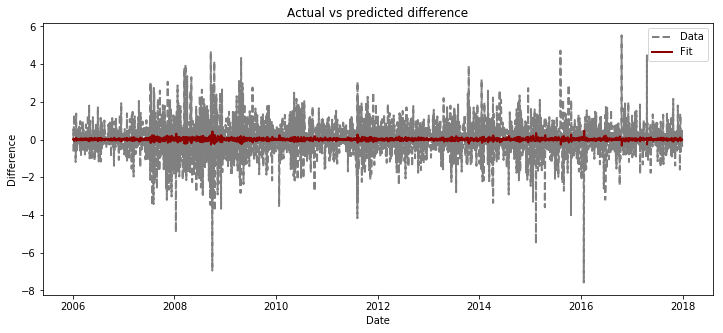

In [27]:
# ar1 In sample predictions
date_ticks=df.index

predictions = ar1.predict()
full_pred = df.Close.values[0]+np.cumsum(ar1ma1.fittedvalues)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], df.Close[1:], lw=2, color='darkred')
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Close vs predicted close")
plt.legend()
plt.show();

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], df.close_diff_1[1:], lw=2, color='grey', ls='dashed',label='Data')
ax.plot(date_ticks[1:], predictions, lw=2, color='darkred',label='Fit')
plt.xlabel("Date")
plt.ylabel("Difference")
plt.title("Actual vs predicted difference")
plt.legend()
plt.show();


In [28]:
#evaluating r^2, how much of the variance my model accounted for
r2_score(df.close_diff_1[1:], ar1.fittedvalues)

#the above would not run because of the following error
#"Found input variables with inconsistent numbers of samples: [3020, 3019]"
#that is why I have to start it after index 0


/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


0.0036223750042150282

In [29]:
#Terrible

In [30]:
df.shape, predictions.shape

((3020, 3), (3019,))

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


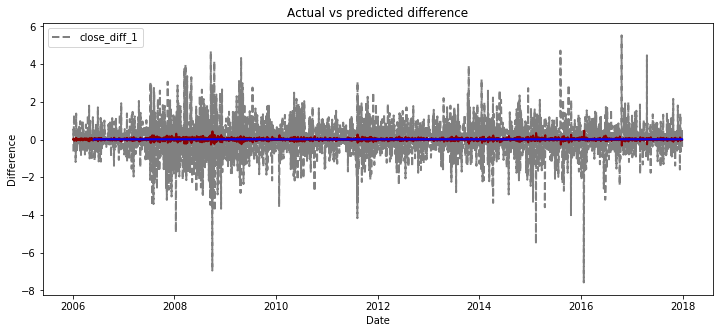

In [31]:
# ar1 Out of sample predictions

predictions_oos = ar1.predict(start=100, dynamic=True)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks, df.close_diff_1, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], predictions, lw=2, color='darkred')
ax.plot(date_ticks[101:], predictions_oos, lw=2, color='blue')
plt.xlabel("Date")
plt.ylabel("Difference")
plt.title("Actual vs predicted difference")
plt.legend()
plt.show();

/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


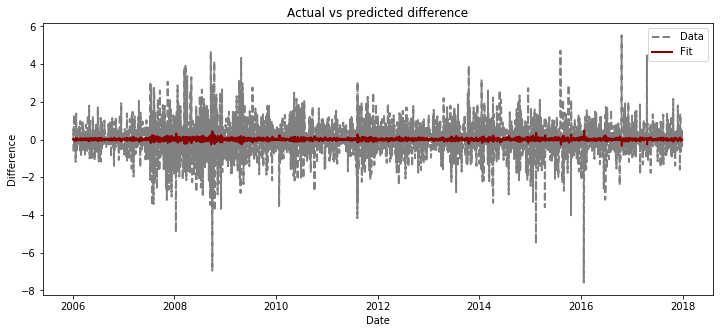

In [32]:
#Comparing moving average model to actual prices
#Not entirely sure about what this is depicting

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks, df.close_diff_1, lw=2, color='grey', ls='dashed',label='Data')
ax.plot(date_ticks[1:], ma1.fittedvalues, lw=2, color='darkred',label='Fit')
plt.xlabel("Date")
plt.ylabel("Difference")
plt.title("Actual vs predicted difference")
plt.legend()
plt.show();